In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [35]:
# Add 'overweight' column

df['overweight'] = np.where((df['weight']/((df['height']/100)**2)) > 25, 1, 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [36]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

df['cholesterol_n'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc_n'] = np.where(df['gluc'] == 1, 0, 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,cholesterol_n,gluc_n
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,0,0


In [87]:
# To create a new data frome that turns measures into variables
# 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'

df_cat = pd.melt(df, id_vars=['cardio'], 
                 value_vars = ['active', 'alco', 'cholesterol_n', 'gluc_n', 'overweight',  'smoke'])
df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


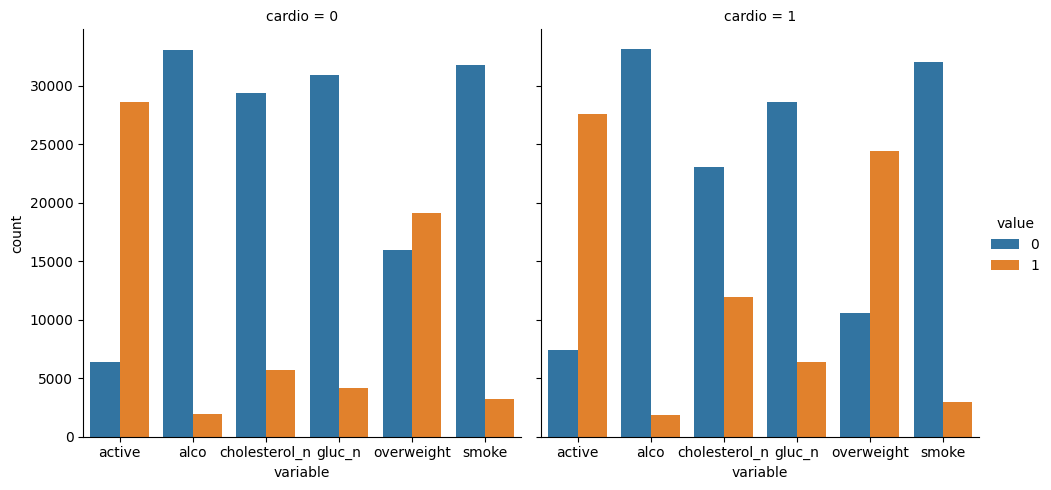

In [88]:
sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count')

In [98]:
# Clean the data. Filter out the following patient segments that represent incorrect data:
# diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile

df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,cholesterol_n,gluc_n
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,0,0


In [104]:
corr = df_heat.corr()

corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,cholesterol_n,gluc_n
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.005581,0.002242,-0.002732,-0.000708,0.005891,0.003900,-0.000679,0.003719,0.002289
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970,-0.011445,0.240241,0.089573,0.129996,0.086990
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.038756,-0.023419,0.337436,0.168637,0.007864,0.002320,-0.052930,-0.037605,-0.021357
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785,-0.005661,-0.024102,-0.149570,-0.063522,-0.030469
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917,-0.014430,0.170042,0.655926,0.135981,0.107072
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769,-0.000222,0.050556,0.017327,0.022807,0.011111
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042,0.001569,0.327181,0.172212,0.150362,0.074840
cholesterol,0.005581,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050,0.007381,0.219090,0.124846,0.930541,0.408480
gluc,0.002242,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805,-0.007709,0.087621,0.076303,0.383580,0.941387
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200,0.026940,-0.020345,-0.003274,0.012680,-0.004157


In [117]:
# extract the upper triangle

mask = np.triu(np.ones(corr.shape))

In [123]:
corr1 = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))

corr1

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,cholesterol_n,gluc_n
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.002507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,0.003426,-0.018132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,0.000326,-0.076932,0.505785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,0.000149,0.070168,0.129979,0.251503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,0.005581,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gluc,0.002242,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


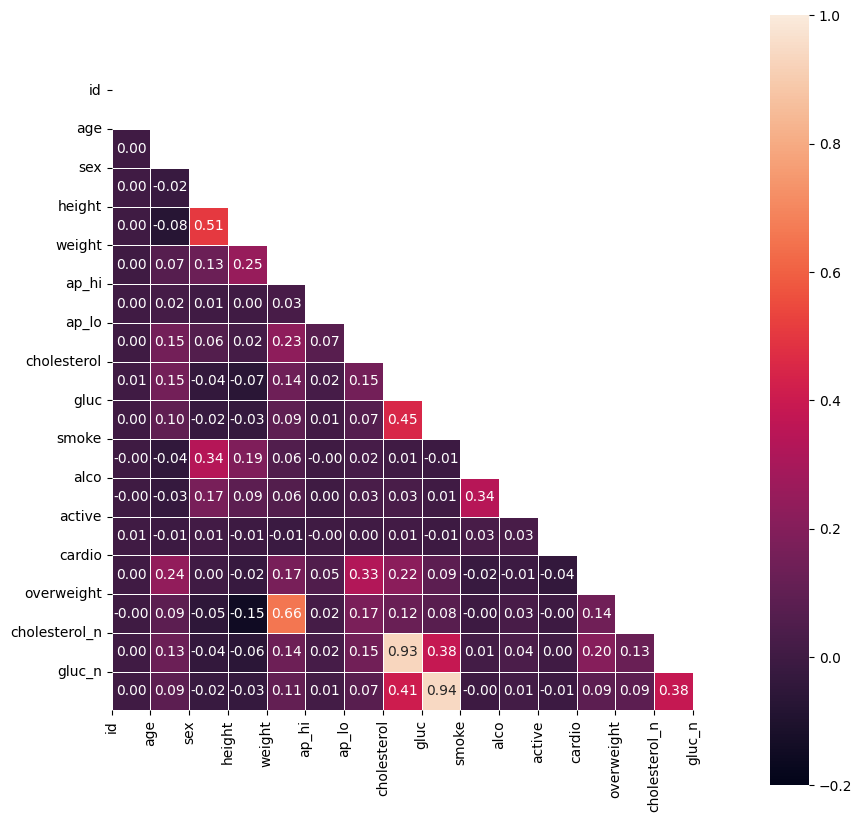

In [142]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr1, annot=True, fmt='.2f',  
                 vmin=-0.2, vmax=1.0, 
                 square=True, linewidths=.5, ax=ax)
plt.xticks(range(len(corr1.columns)), corr1.columns, rotation ='vertical')
plt.yticks(range(len(corr1.columns)), corr1.columns, rotation = 'horizontal') 
plt.show()